<a href="https://colab.research.google.com/github/devajeeta/Complete-Python-3-Bootcamp/blob/master/Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK6:Create the Decision Tree classifier and visualize it graphically.



-BY Devajeeta Datta

Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the Iris dataset

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [39]:
import numpy as np
import pandas as pd
df = pd.read_csv("Iris.csv")

In [5]:
# Check the head of the dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.info

<bound method DataFrame.info of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

In [9]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [40]:
#checking duplicates
df.duplicated().sum()

0

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.drop(["Id"],axis=1,inplace=True)

Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

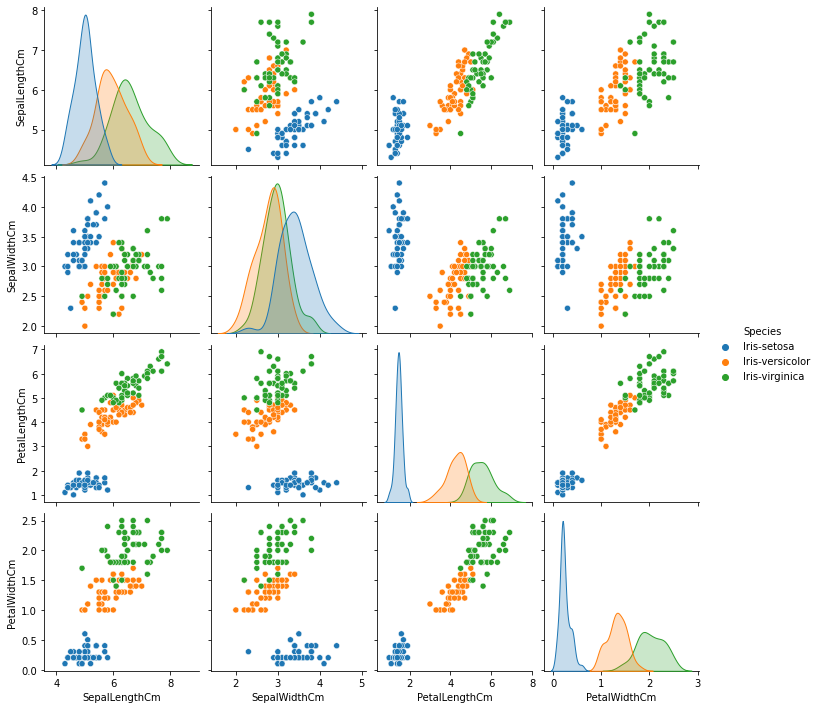

In [14]:
sns.pairplot(df, hue="Species")

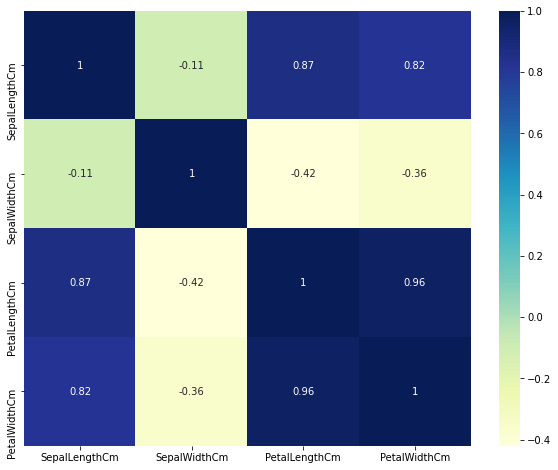

In [15]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

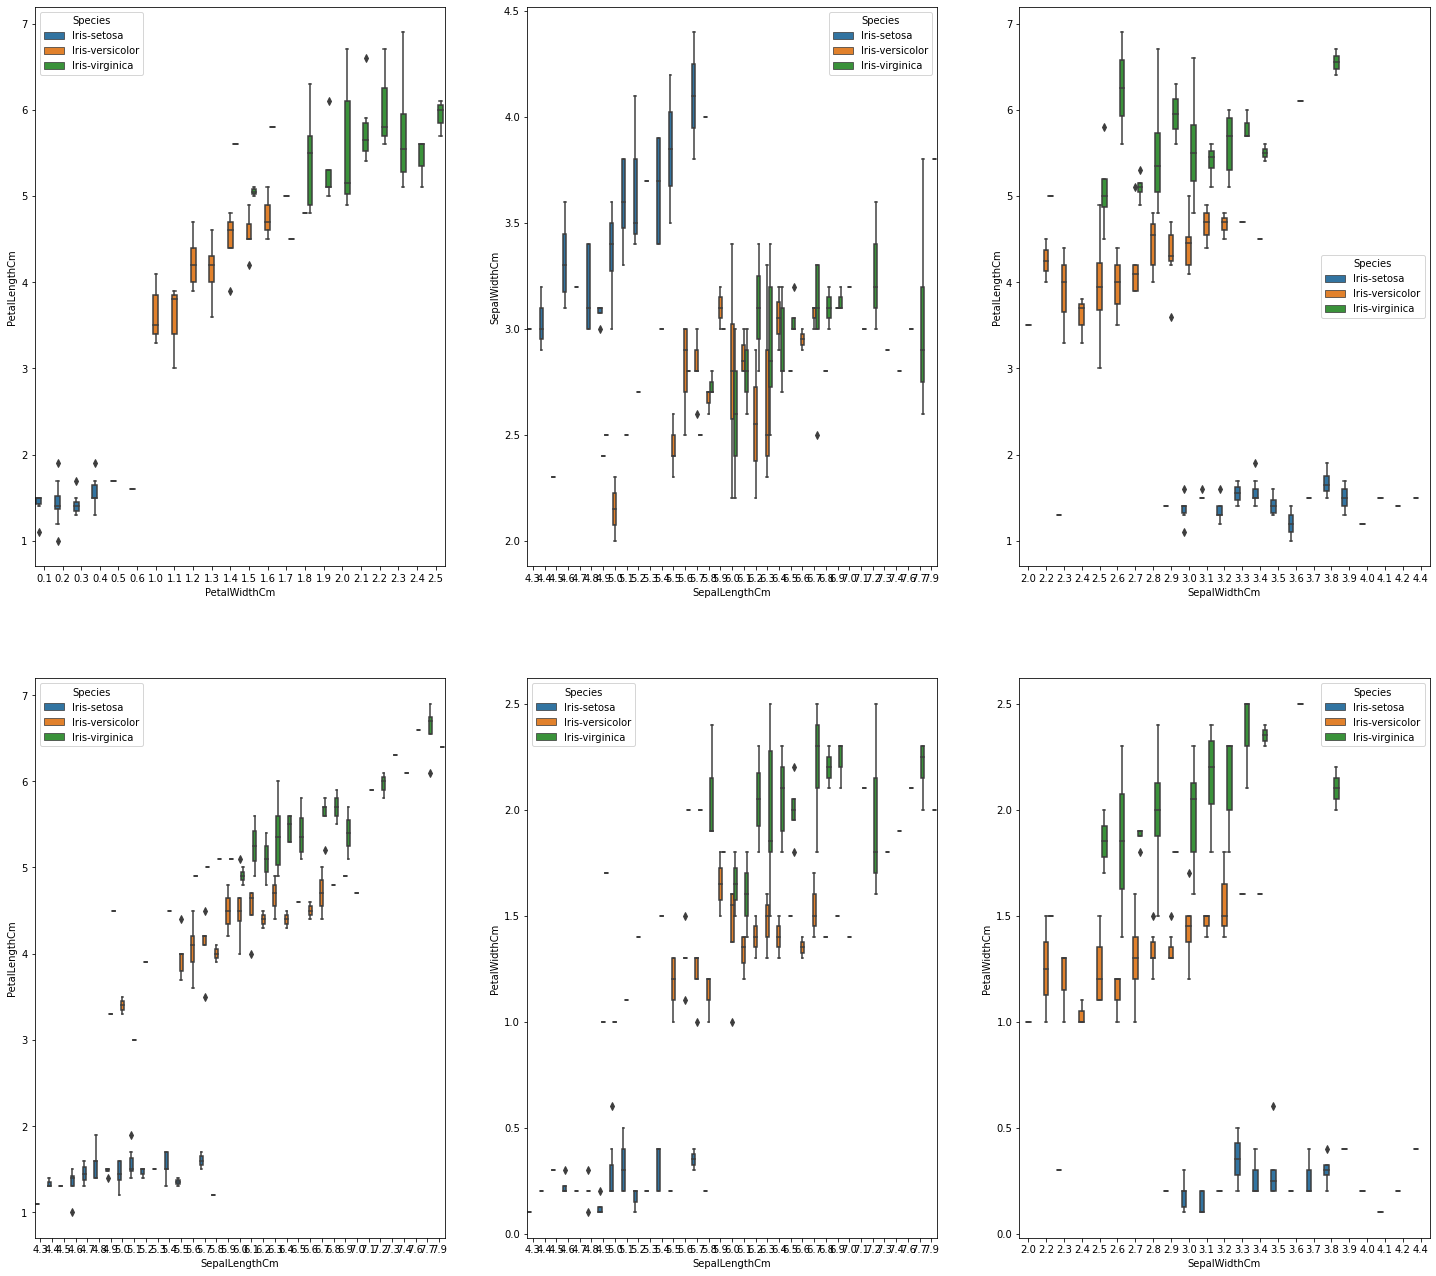

In [16]:
plt.figure(figsize=(25, 35))
plt.subplot(3,3,1)
sns.boxplot(data = df, y= 'PetalLengthCm', x = 'PetalWidthCm',hue='Species')
plt.subplot(3,3,2)
sns.boxplot(data = df, y= 'SepalWidthCm', x = 'SepalLengthCm',hue='Species')
plt.subplot(3,3,3)
sns.boxplot(data = df, y= 'PetalLengthCm', x = 'SepalWidthCm',hue='Species')
plt.subplot(3,3,4)
sns.boxplot(data = df, y= 'PetalLengthCm', x = 'SepalLengthCm',hue='Species')
plt.subplot(3,3,5)
sns.boxplot(data = df, y= 'PetalWidthCm', x = 'SepalLengthCm',hue='Species')
plt.subplot(3,3,6)
sns.boxplot(data = df, y= 'PetalWidthCm', x = 'SepalWidthCm',hue='Species')

Step 3: Data Preparation

In [17]:
#Encoding Species as it is a non-numeric data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [18]:
df['Species'] = df['Species'].astype("category")
df['Species'] = le.fit_transform(df['Species'])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [20]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

Rescaling the Features
If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = df.columns

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [24]:
df_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
6,0.083333,0.636364,0.070175,0.083333,0.0
25,0.194444,0.454545,0.105263,0.041667,0.0
21,0.222222,0.772727,0.087719,0.125000,0.0
92,0.416667,0.272727,0.526316,0.458333,0.5
9,0.166667,0.500000,0.087719,0.000000,0.0


In [25]:
df_train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.416667,0.480087,0.479532,0.450794,0.490476
std,0.224712,0.190246,0.301735,0.305519,0.398199
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.363636,0.105263,0.083333,0.000000
50%,0.416667,0.454545,0.578947,0.500000,0.500000
75%,0.583333,0.590909,0.719298,0.708333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


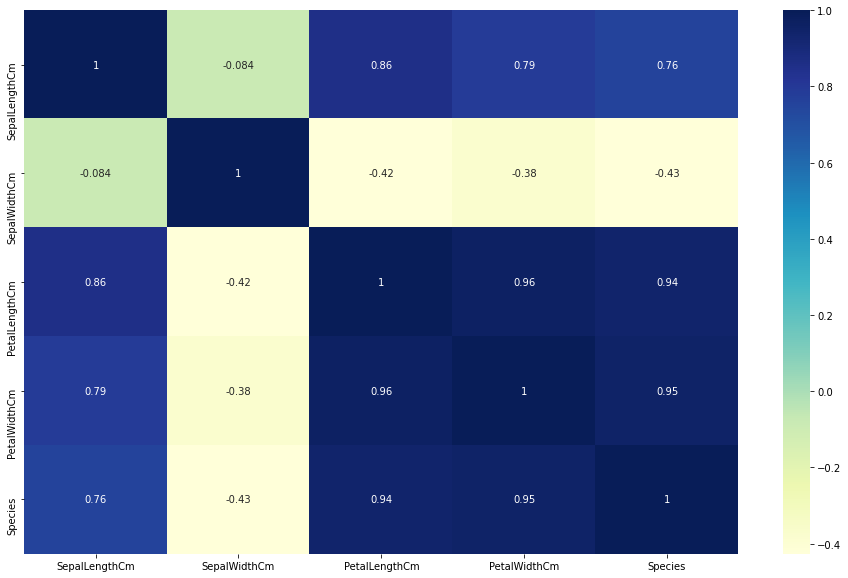

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
# Splitting the data into train and test sets
X = df.drop("Species",axis=1)
y = df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)

In [29]:
# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier( )
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

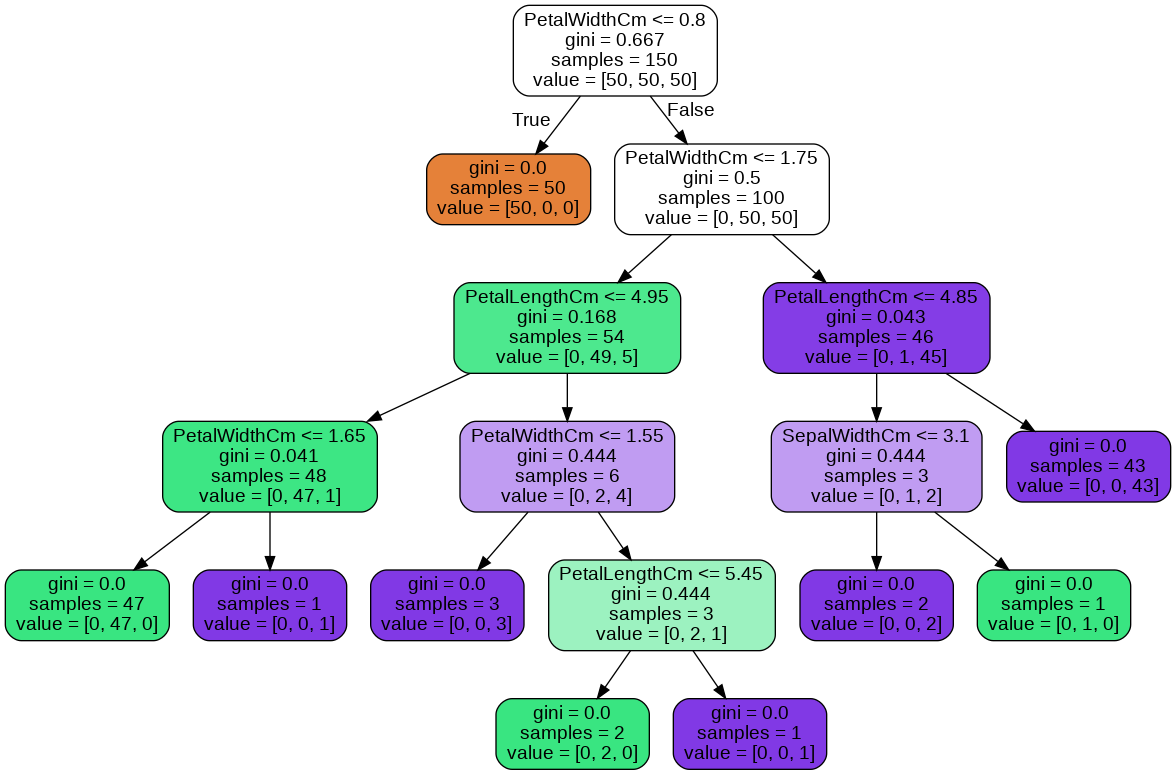

In [30]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [31]:
y_train_pred = dt.predict(X_train)

In [32]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

1.0

In [33]:
y_test_pred = dt.predict(X_test)

In [34]:
r2_score(y_test, y_test_pred)

1.0

In [35]:

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  1.0


In [37]:
from sklearn.metrics import classification_report 

In [38]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



When test data is feed in the classifer it is able to classify perfectly.